# Final Project: Analysis of Pesticide Usage and Climate Impacts on U.S. Honey Production

### Shannon McFarland
### 6/3/23

In [1]:
import numpy as np
import pandas as pd

import thinkstats2
import thinkplot

In [2]:
# reads cleaned up honey production, pesticide usage, and temperature data
honey_df = pd.read_excel('Honey_Production_Data.xlsx') 
honey_df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,Region,nCLOTHIANIDIN,...,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic,march_temp,april_temp,avg_springtemp,august_temp,sept_temp,avg_falltemp
0,AL,16000,58,928000,28000,0.69,640000,1995,South,0.0,...,0.0,0.0,0.0,716.5,52.9,60.7,56.80,77.4,74.7,76.05
1,AL,15000,64,960000,96000,0.87,835000,1996,South,0.0,...,0.0,0.0,0.0,371.6,49.1,55.4,52.25,81.5,77.8,79.65
2,AL,14000,66,924000,92000,0.81,748000,1997,South,0.0,...,0.0,0.0,0.0,6704.8,56.0,60.0,58.00,78.8,75.0,76.90
3,AL,16000,71,1136000,159000,0.72,818000,1998,South,0.0,...,0.0,0.0,0.0,1836.3,51.3,57.5,54.40,78.9,76.2,77.55
4,AL,17000,68,1156000,185000,0.56,647000,1999,South,0.0,...,0.0,0.0,0.0,1251.2,52.3,59.9,56.10,80.9,78.6,79.75


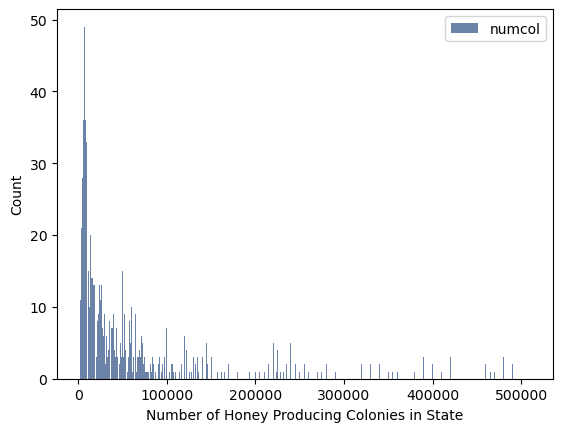

In [3]:
# Histogram showcasing frequency of the number of honey producing colonies
# Histogram is heavily skewed to the right
hist = thinkstats2.Hist(honey_df.numcol, label='numcol')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Honey Producing Colonies in State', ylabel='Count')

In [4]:
# Number of Colonies Summary Statistics
print("mean:", honey_df.numcol.mean())
print("variance:", honey_df.numcol.var())
print("standard deviation:", honey_df.numcol.std())

mean: 62090.48178613396
variance: 8355385921.061829
standard deviation: 91407.80011061326


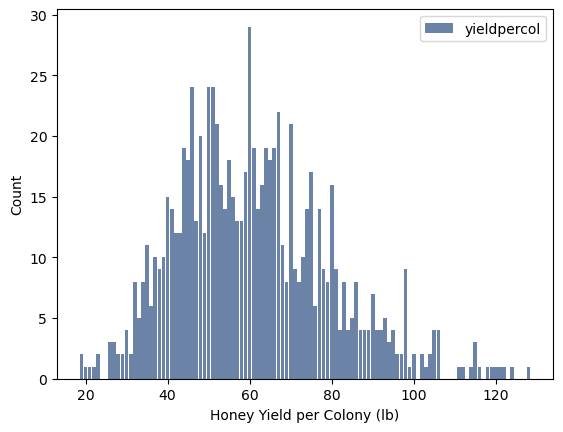

In [5]:
# Histogram showcasing frequency of the honey yield per colony
# Histogram follows a rough normal distribution with a slight skew to the right
hist = thinkstats2.Hist(honey_df.yieldpercol, label='yieldpercol')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Honey Yield per Colony (lb)', ylabel='Count')

In [6]:
# Honey Yield per Colony Summary Statistics
print("mean:", honey_df.yieldpercol.mean())
print("variance:", honey_df.yieldpercol.var())
print("standard deviation:", honey_df.yieldpercol.std())

mean: 60.990599294947124
variance: 353.97167622865857
standard deviation: 18.8141350114391


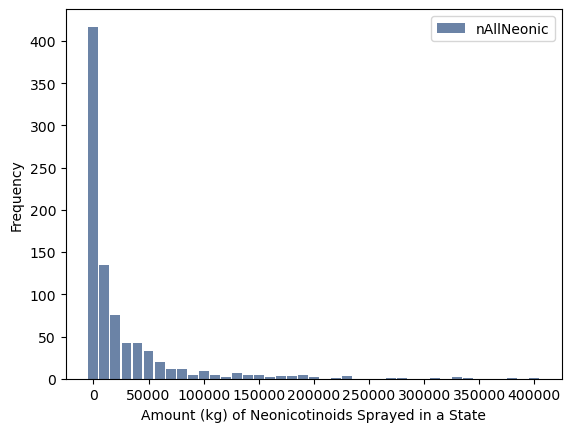

In [7]:
# Histogram showcasing the frequency of the amount (kg) of neonicotinoids sprayed in a state
# Histogram is heavily skewed to the right
pest = honey_df.nAllNeonic.round(-4)
hist = thinkstats2.Hist(pest, label='nAllNeonic')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Amount (kg) of Neonicotinoids Sprayed in a State', ylabel='Frequency')

In [8]:
# Amount of Neonicotinoids Applied Summary Statistics
print("mean:", honey_df.nAllNeonic.mean())
print("variance:", honey_df.nAllNeonic.var())
print("standard deviation:", honey_df.nAllNeonic.std())

mean: 24930.175558166866
variance: 2320085455.766065
standard deviation: 48167.26539638788


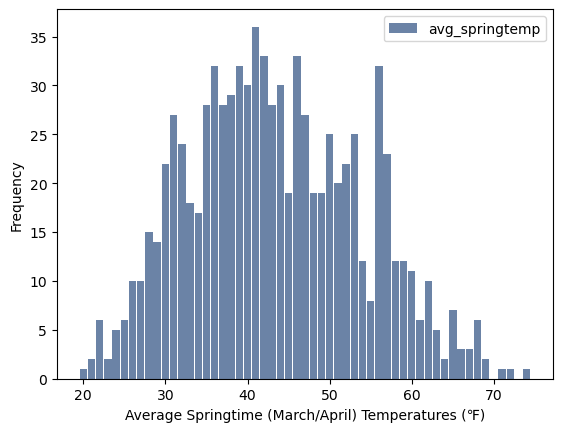

In [9]:
# Histogram showcasing the frequency of average springtime temperatures in a state
# Histogram follows a rough normal distribution with a slight skew to the right
spring = round(honey_df.avg_springtemp)
hist = thinkstats2.Hist(spring, label='avg_springtemp')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Average Springtime (March/April) Temperatures (℉)', ylabel='Frequency')

In [10]:
# Average Sprigntime Temperatures Summary Statistics
print("mean:", honey_df.avg_springtemp.mean())
print("variance:", honey_df.avg_springtemp.var())
print("standard deviation:", honey_df.avg_springtemp.std())

mean: 43.38090481786134
variance: 109.1748731803414
standard deviation: 10.448678058986285


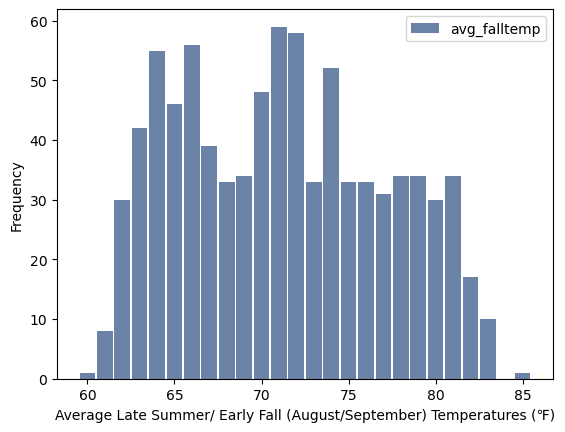

In [11]:
# Histogram showcasing the average late summer/early fall tempertures in a state
# Histogram follows a bimodal distribution as it has two main peaks towards the left
fall = round(honey_df.avg_falltemp)
hist = thinkstats2.Hist(fall, label='avg_falltemp')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Average Late Summer/ Early Fall (August/September) Temperatures (℉)', ylabel='Frequency')

In [12]:
# Average Late Summer/ Early Fall Temperatures Summary Statistics
print("mean:", honey_df.avg_falltemp.mean())
print("variance:", honey_df.avg_falltemp.var())
print("standard deviation:", honey_df.avg_falltemp.std())

mean: 71.23061104582852
variance: 34.384576567360185
standard deviation: 5.863836335314978


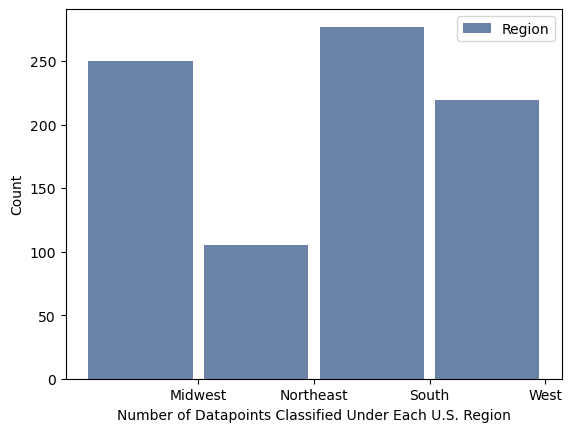

In [13]:
# Histogram displaying the number of datapoints classified under each U.S. region
# Histogram showcases the data in the dataset is not equally representing the different U.S. regions
hist = thinkstats2.Hist(honey_df.Region, label='Region')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Datapoints Classified Under Each U.S. Region', ylabel='Count')

In [14]:
# Sorts honey production data by the midwest and southern states
Midwest = honey_df[honey_df.Region == "Midwest"]
South = honey_df[honey_df.Region == "South"]

# Computes pmf for average late summer/early fall temperatures for midwest and southern states
Midwest_pmf = thinkstats2.Pmf(Midwest.avg_falltemp, label = "Midwest")
South_pmf = thinkstats2.Pmf(South.avg_falltemp, label = "South")

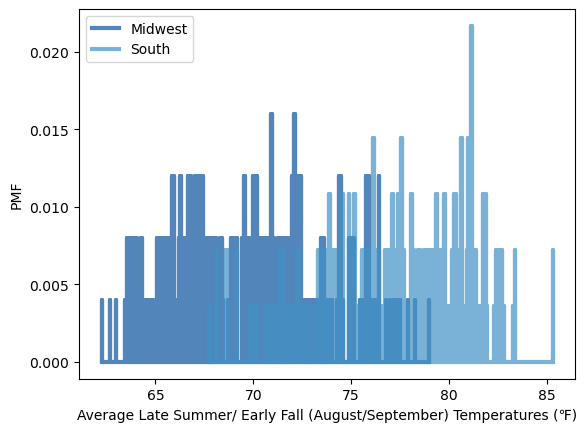

In [15]:
# pmf plot of showcasing the distributions of fall temperatures for midwest and southern states
thinkplot.PrePlot(2)
thinkplot.Pmfs([Midwest_pmf, South_pmf])
thinkplot.Config(xlabel = "Average Late Summer/ Early Fall (August/September) Temperatures (℉)", ylabel="PMF")

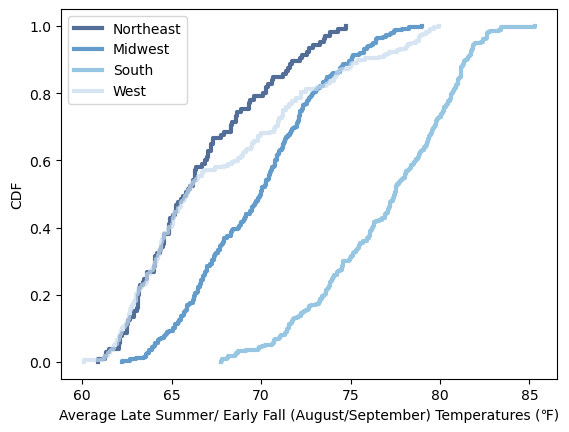

In [16]:
# Sorts honey production data by the Northeast and Western states
Northeast = honey_df[honey_df.Region == "Northeast"]
West = honey_df[honey_df.Region == "West"]

# Computes cdfs for average late summer/early fall temperatures for the differents U.S. regions
Northeast_cdf = thinkstats2.Cdf(Northeast.avg_falltemp, label = "Northeast")
Midwest_cdf = thinkstats2.Cdf(Midwest.avg_falltemp, label = "Midwest")
South_cdf = thinkstats2.Cdf(South.avg_falltemp, label = "South")
West_cdf = thinkstats2.Cdf(West.avg_falltemp, label = "West")

thinkplot.PrePlot(4)
thinkplot.Cdfs([Northeast_cdf, Midwest_cdf, South_cdf, West_cdf])
thinkplot.Config(xlabel='Average Late Summer/ Early Fall (August/September) Temperatures (℉)', ylabel='CDF')

Mean, Var 60.792814371257485 310.77743339667967
Sigma 17.628880662046573


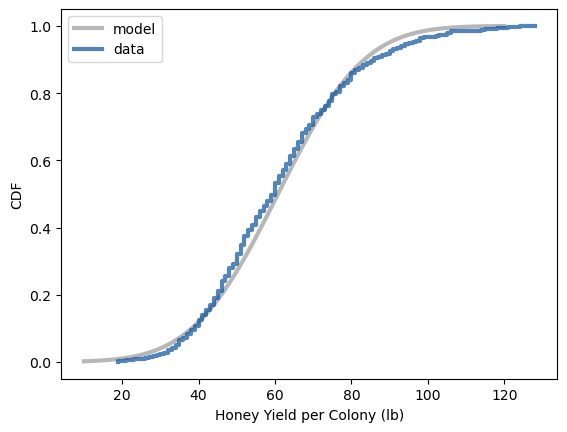

In [17]:
# Analytical Distribution: Normal distribution test of yieldpercol variable 
yieldpercol = honey_df.yieldpercol
mu, var = thinkstats2.TrimmedMeanVar(yieldpercol, p=0.01) # removes outliers for normal model creation
print("Mean, Var", mu, var)

# Creates and plots normal distribution model based on mean and standard deviation of yieldpercol variable
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=10, high=120)
thinkplot.Plot(xs, ps, label="model", color="0.6")


yieldpercol_cdf = thinkstats2.Cdf(yieldpercol, label="data")

# cdf plot of yield per colony compared to a normal model using its mean and standard deviation
thinkplot.PrePlot(1)
thinkplot.Cdf(yieldpercol_cdf)
thinkplot.Config(xlabel="Honey Yield per Colony (lb)", ylabel="CDF")

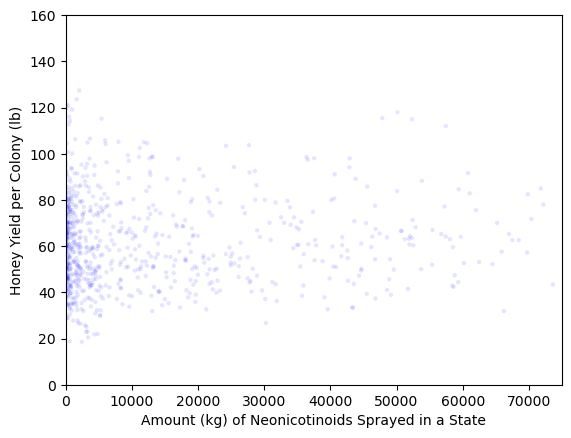

In [18]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

pesticide = Jitter(honey_df.nAllNeonic)
yieldpercol = Jitter(honey_df.yieldpercol)

# Scatter plot comparing relationship between amount of pesticide spray and honey yield per colony
# Due to the wide spread of the pesticide amount variable, X axis cut off at 75,000 for better data visibility
thinkplot.Scatter(pesticide, yieldpercol, alpha=0.1, s=10)
thinkplot.Config(xlabel='Amount (kg) of Neonicotinoids Sprayed in a State',
                 ylabel='Honey Yield per Colony (lb)', axis=[0, 75000, 0, 160]) # due 


In [19]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr


def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)


print("Covariance:", Cov(pesticide, yieldpercol))
print("Correlation:", SpearmanCorr(pesticide, yieldpercol))

Covariance: -56885.0672668931
Correlation: -0.030694217144993412


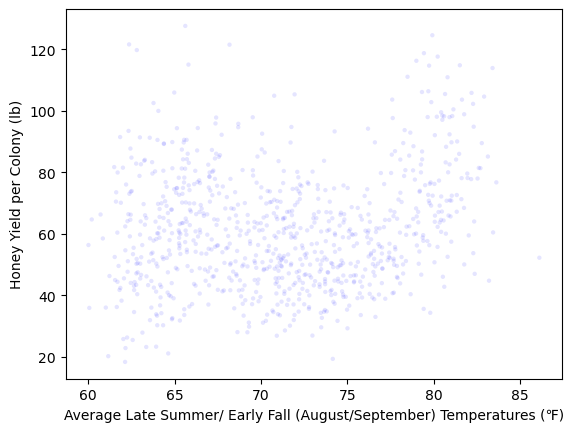

In [20]:
falltemp = Jitter(honey_df.avg_falltemp)
yieldpercol = Jitter(honey_df.yieldpercol)

# Scatter plot comparing relationship between late summer/early fall temperatures and honey yield per colony
thinkplot.Scatter(falltemp, yieldpercol, alpha=0.1, s=10)
thinkplot.Config(xlabel='Average Late Summer/ Early Fall (August/September) Temperatures (℉)',
                 ylabel='Honey Yield per Colony (lb)')

In [21]:
print("Covariance:", Cov(falltemp, yieldpercol))
print("Correlation:", SpearmanCorr(falltemp, yieldpercol))

Covariance: 18.64635522946507
Correlation: 0.12461709358939285


In [22]:
# Hypothesis Test: Difference in Means/ Permutation Test
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    
    
yr1995 = honey_df[honey_df.year == 1995] # Compiles honey production data from 1995
yr2015 = honey_df[honey_df.year == 2015] # Compiles honey production data from 2015

data = yr1995.yieldpercol.values, yr2015.yieldpercol.values

# Difference in Mean/Permutation Test comparing honey yield per colony from 1995 and 2015
ht = DiffMeansPermute(data)
print("pvalue:", ht.PValue())

pvalue: 0.016


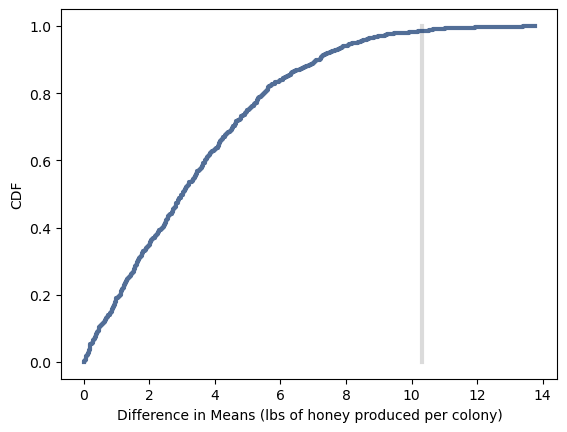

In [23]:
# Gray line on permutation plot is the observed difference between the means
ht.PlotCdf()
thinkplot.Config(xlabel='Difference in Means (lbs of honey produced per colony)',
                   ylabel='CDF')

In [24]:
# Multiple Regression Model
import statsmodels.formula.api as smf


# Explanatory variables selected: average early late summer/early fall temp, year, and region
# Dependent variable: honey yield per colony 

formula = 'yieldpercol ~ avg_falltemp + year + C(Region)'
model = smf.ols(formula, data=honey_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            yieldpercol   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     35.37
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           6.49e-33
Time:                        02:03:42   Log-Likelihood:                -3623.5
No. Observations:                 851   AIC:                             7259.
Df Residuals:                     845   BIC:                             7287.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1667.3721    195.456      8.531      0.000    1283.736    2051.008
C(Region)[T.Northeast]   -15.7286      2.050     -7.672      0.000     -19.752     -11.705
C(Region)[T.South]        -6.1360      1.811     -3.388      0.001      -9.691      -2.581
C(Region)[T.West]        -11.7304      1.614     -7.268      0.000     -14.898      -8.563
avg_falltemp               0.3215      0.142      2.267      0.024       0.043       0.600
year                      -0.8092      0.098     -8.295      0.000      -1.001      -0.618
==============================================================================
Omnibus:                       71.344   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.046
Skew:                           0.724   Prob(JB):                     4.61e-20
Kurtosis:                       3.643   Cond. No.                     6.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""